In [ ]:
from tensorflow.keras.datasets import mnist

(X_full, y_full), (X_test, y_test) = mnist.load_data()

X_valid, X_train = X_full[:5000] / 255.0, X_full[5000:] / 255.0
y_valid, y_train = y_full[:5000], y_full[5000:]

X_test = X_test / 255.0

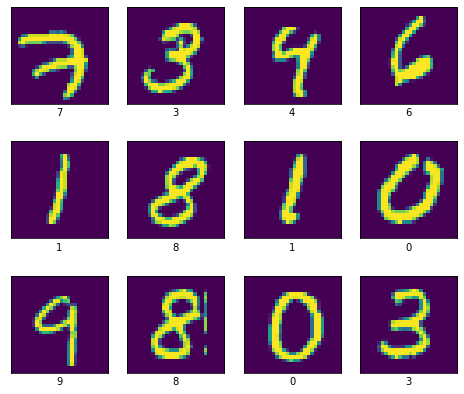

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 7))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()


In [ ]:
#Reshape input 2D
X_train = X_train.reshape((55000, 28, 28, 1))
X_valid = X_valid.reshape((5000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

# build the model

model = Sequential([
    Conv2D(16, (5, 5), strides=(1, 1), input_shape=(28, 28, 1), padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (5, 5), strides=(1, 1), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), strides=(1, 1), padding="same"),
    BatchNormalization(),
    Activation("relu"),
    Conv2D(128, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    #Dropout(0.3),
    Dense(10, activation="softmax"),
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0

In [ ]:
import tensorflow as tf

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.SGD(learning_rate = 0.02, momentum = 0.9), 
              metrics=["accuracy"])


# start training
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 8ms/step - loss: 0.2456 - accuracy: 0.9248 - val_loss: 0.0843 - val_accuracy: 0.9778
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0808 - accuracy: 0.9765 - val_loss: 0.0589 - val_accuracy: 0.9820
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0603 - accuracy: 0.9825 - val_loss: 0.0401 - val_accuracy: 0.9884
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0487 - accuracy: 0.9860 - val_loss: 0.0360 - val_accuracy: 0.9912
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0428 - accuracy: 0.9874 - val_loss: 0.0288 - val_accuracy: 0.9928
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0312 - val_accuracy: 0.9920
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0334 - accuracy: 0.9899 - val_loss: 0.0278 - val_ac

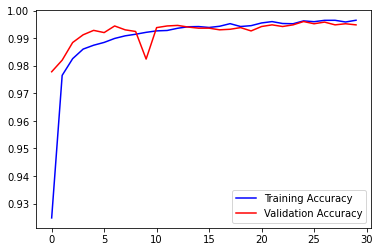

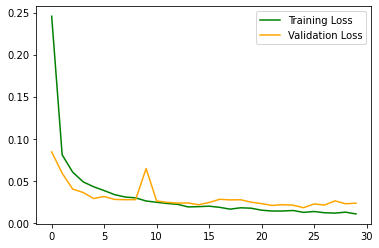

In [ ]:
def plot_graph():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(range(epochs), acc, "b", label="Training Accuracy")
    plt.plot(range(epochs), val_acc, "r", label="Validation Accuracy")
    plt.legend()

    plt.figure()

    plt.plot(range(epochs), loss, "g", label="Training Loss")
    plt.plot(range(epochs), val_loss, "orange", label="Validation Loss")
    plt.legend()

    plt.show()

plot_graph()


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print(f'TEST ERROR RATE: {((1-test_acc)*100):.2f} %')

313/313 - 1s - loss: 0.0171 - accuracy: 0.9962

Test accuracy: 0.9962000250816345
TEST ERROR RATE: 0.38 %
